## Leetcode

https://leetcode.com/problems/cherry-pickup-ii/description/

**Description**

    You are given a rows x cols matrix grid representing a field of cherries where grid[i][j] represents the number of cherries that you can collect from the (i, j) cell.

    You have two robots that can collect cherries for you:

    Robot #1 is located at the top-left corner (0, 0), and
    Robot #2 is located at the top-right corner (0, cols - 1).
    Return the maximum number of cherries collection using both robots by following the rules below:

    From a cell (i, j), robots can move to cell (i + 1, j - 1), (i + 1, j), or (i + 1, j + 1).
    When any robot passes through a cell, It picks up all cherries, and the cell becomes an empty cell.
    When both robots stay in the same cell, only one takes the cherries.
    Both robots cannot move outside of the grid at any moment.
    Both robots should reach the bottom row in grid.
    

    Example 1:

    Input: grid = [[3,1,1],[2,5,1],[1,5,5],[2,1,1]]
    Output: 24
    Explanation: Path of robot #1 and #2 are described in color green and blue respectively.
    Cherries taken by Robot #1, (3 + 2 + 5 + 2) = 12.
    Cherries taken by Robot #2, (1 + 5 + 5 + 1) = 12.
    Total of cherries: 12 + 12 = 24.
    
    Example 2:

    Input: grid = [[1,0,0,0,0,0,1],[2,0,0,0,0,3,0],[2,0,9,0,0,0,0],[0,3,0,5,4,0,0],[1,0,2,3,0,0,6]]
    Output: 28
    Explanation: Path of robot #1 and #2 are described in color green and blue respectively.
    Cherries taken by Robot #1, (1 + 9 + 5 + 2) = 17.
    Cherries taken by Robot #2, (1 + 3 + 4 + 3) = 11.
    Total of cherries: 17 + 11 = 28.
    

**Constraints**

    rows == grid.length
    cols == grid[i].length
    2 <= rows, cols <= 70
    0 <= grid[i][j] <= 100


In [15]:
from typing import List
from itertools import product

In [16]:
class Solution:
    def cherryPickup(self, grid: List[List[int]]) -> int:
        ROWS, COLS = len(grid), len(grid[0])
        tmp = [[-1] * COLS for _ in range(COLS)]
      
        temp_dp = [[-1] * COLS for _ in range(COLS)]
      
        tmp[0][COLS - 1] = grid[0][0] + grid[0][COLS - 1]

        for row in range(1, ROWS):
            for j1 in range(COLS):
                for j2 in range(COLS):
                    cherries = grid[row][j1] + (0 if j1 == j2 else grid[row][j2])
                  
                    for y1 in range(max(j1 - 1, 0), min(j1 + 2, COLS)):
                        for y2 in range(max(j2 - 1, 0), min(j2 + 2, COLS)):
                            if tmp[y1][y2] != -1:
                                temp_dp[j1][j2] = max(temp_dp[j1][j2], tmp[y1][y2] + cherries)
          
            tmp, temp_dp = temp_dp, [[-1] * COLS for _ in range(COLS)]

        return max(tmp[j1][j2] for j1, j2 in product(range(COLS), range(COLS)))

        

In [17]:
sol = Solution()
print(sol.cherryPickup(grid = [[3,1,1],[2,5,1],[1,5,5],[2,1,1]]))
print(sol.cherryPickup(grid = [[1,0,0,0,0,0,1],[2,0,0,0,0,3,0],[2,0,9,0,0,0,0],[0,3,0,5,4,0,0],[1,0,2,3,0,0,6]]))

24
28


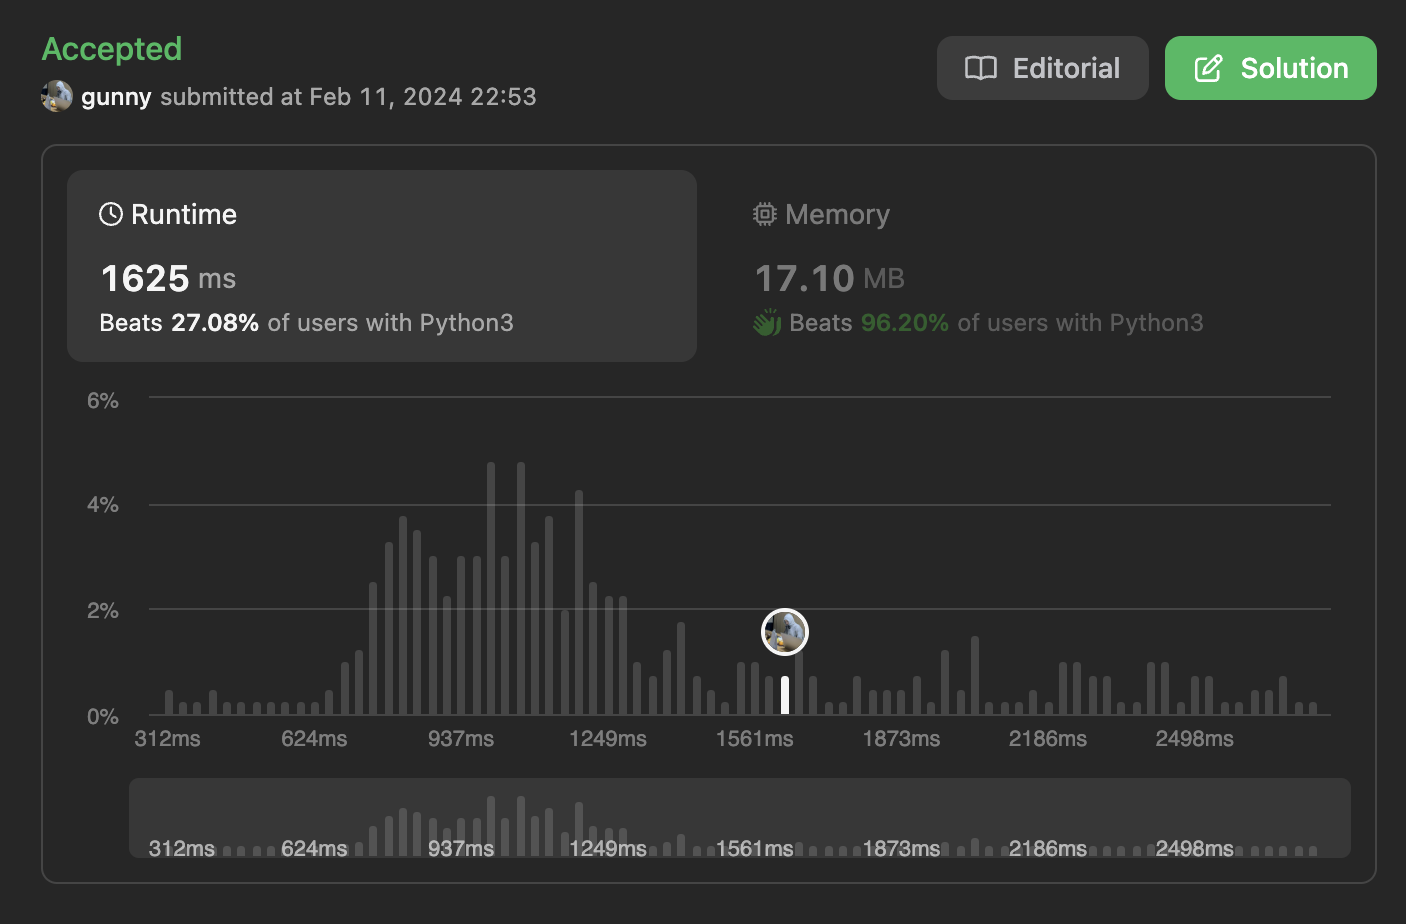